In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Вы получили основные навыки обработки данных, теперь пора испытать их на практике. Сейчас вам предстоит заняться задачей классификации.

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [2]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [3]:
data.describe(include = 'all').transpose()

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A706536,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


In [4]:
data.isnull().sum()
# проверка наличия пропусков

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

age_upon_outcome    0
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
name                0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    0
dtype: int64

In [7]:
data.describe(include = 'all').transpose()

,count,unique,top,freq
age_upon_outcome,17699,46,1 year,2669
animal_id,17699,17460,A731245,3
animal_type,17699,4,Dog,9822
breed,17699,1010,Domestic Shorthair Mix,5837
color,17699,324,Black/White,1886
date_of_birth,17699,4385,2015-09-01T00:00:00,56
datetime,17699,14121,2016-04-18T00:00:00,39
monthyear,17699,14121,2016-04-18T00:00:00,39
name,17699,7584,Bella,76
outcome_subtype,17699,18,Partner,10863


In [8]:
data.dtypes

age_upon_outcome    object
animal_id           object
animal_type         object
breed               object
color               object
date_of_birth       object
datetime            object
monthyear           object
name                object
outcome_subtype     object
outcome_type        object
sex_upon_outcome    object
dtype: object

In [9]:
data.shape

(17699, 12)

In [10]:
data = data.drop_duplicates()
data.shape

(17698, 12)

In [11]:
data_adoption = data.query("outcome_type == 'Transfer'")
data_adoption.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,11106,11106,11106,11106,11106,11106,11106,11106,11106,11106,11106,11106
unique,44,11026,4,821,279,3561,7956,7956,5779,4,1,5
top,1 year,A688299,Dog,Domestic Shorthair Mix,Black/White,2015-09-01T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Transfer,Neutered Male
freq,2063,3,6643,3269,1225,50,39,39,43,10863,11106,3671


In [12]:
data = data.drop(['name', 'animal_id', 'outcome_subtype', 'date_of_birth', 'datetime', 'monthyear'], axis=1)

In [13]:
data.sample()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome
59473,8 years,Dog,Dachshund Mix,Black/Tan,Adoption,Neutered Male


In [14]:
def f(row):
    if str('Adoption') in row['outcome_type']:
        val = int(1.0)
    elif str('Transfer') in row['outcome_type']:
        val = int(2.0)
    else:
        val = int(0)
    return val
data['outcome'] = data.apply(f, axis=1)
data['age1'] = data['age_upon_outcome'].str.extract('(\d+)')
data['age2'] = data['age_upon_outcome'].str.replace('\d+', '')
def f(row):
    if str('month') in row['age2'] or str('months') in row['age2']:
        val = 'Puppy'
    else:
        val = 'grown-up'
    return val
data['age'] = data.apply(f, axis=1)

In [15]:
labelEnc = LabelEncoder()
columns_for_encode = ["animal_type", "breed", "color", "sex_upon_outcome", 'age']
for column in columns_for_encode:
    data[column + "_enc"] = labelEnc.fit_transform(data[column])
    
data.sample(5)

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,outcome,age1,age2,age,animal_type_enc,breed_enc,color_enc,sex_upon_outcome_enc,age_enc
52989,2 months,Cat,Domestic Shorthair Mix,Blue,Adoption,Spayed Female,1,2,months,Puppy,1,450,35,3,0
39145,8 months,Cat,Domestic Shorthair Mix,Orange Tabby,Transfer,Neutered Male,2,8,months,Puppy,1,450,189,2,0
27101,1 year,Cat,Domestic Shorthair Mix,Orange Tabby,Transfer,Intact Female,2,1,year,grown-up,1,450,189,0,1
10301,4 months,Cat,Domestic Shorthair Mix,Brown Tabby/White,Transfer,Neutered Male,2,4,months,Puppy,1,450,96,2,0
29309,2 years,Dog,Flat Coat Retriever Mix,Brown,Transfer,Intact Male,2,2,years,grown-up,2,489,79,1,1


In [16]:
data = data.drop(columns={'age','age1', 'age2'})
data_final = data.drop(data.columns[0:6], axis=1)
data_final.head()

,outcome,animal_type_enc,breed_enc,color_enc,sex_upon_outcome_enc,age_enc
1,2,2,125,291,3,1
3,2,2,719,281,2,1
5,2,2,661,112,1,0
7,2,2,313,79,3,1
9,1,1,450,283,3,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
x_columns =[x for x in data_final.columns if x != 'outcome']
X = data_final[x_columns]
y = data_final['outcome']

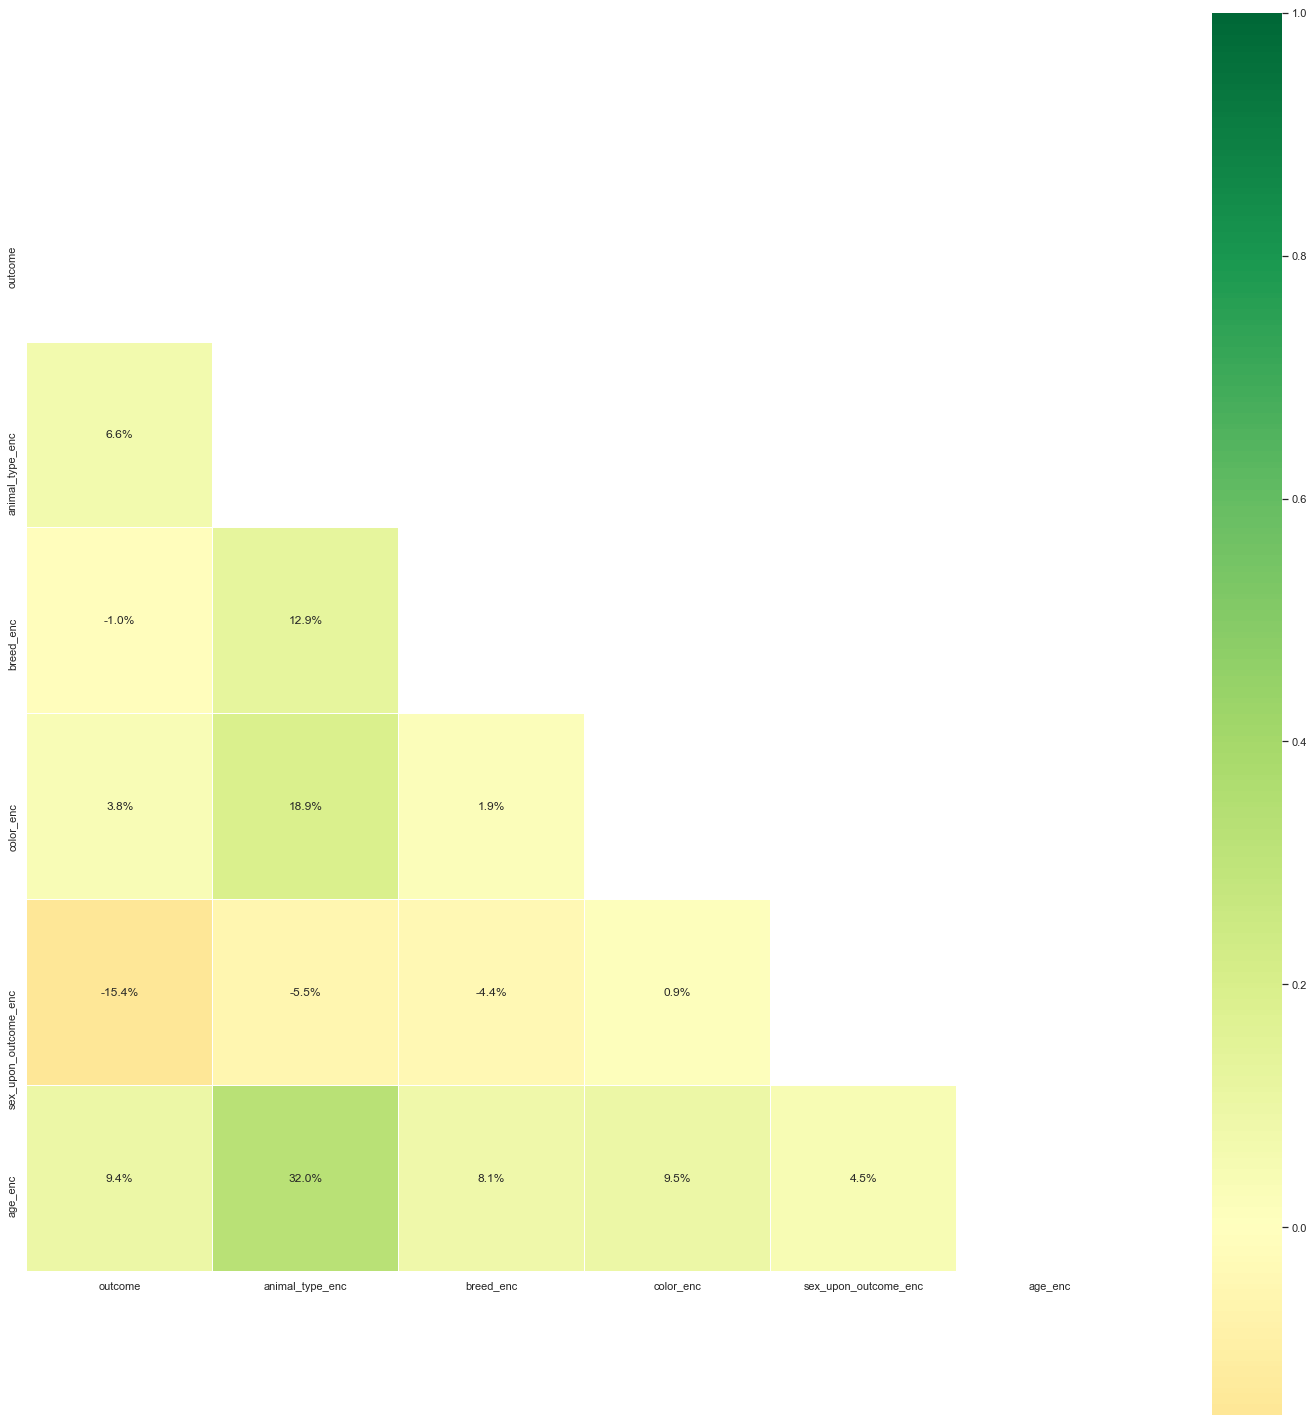

In [19]:
plt.figure(figsize = (20,20))
corr = data_final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.1%",
        linewidths=0.3,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [21]:
from sklearn.metrics import mean_absolute_error
model=RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
y_pred_rfr = model.predict(X_test)
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred_rfr)))

MAE: 0.491


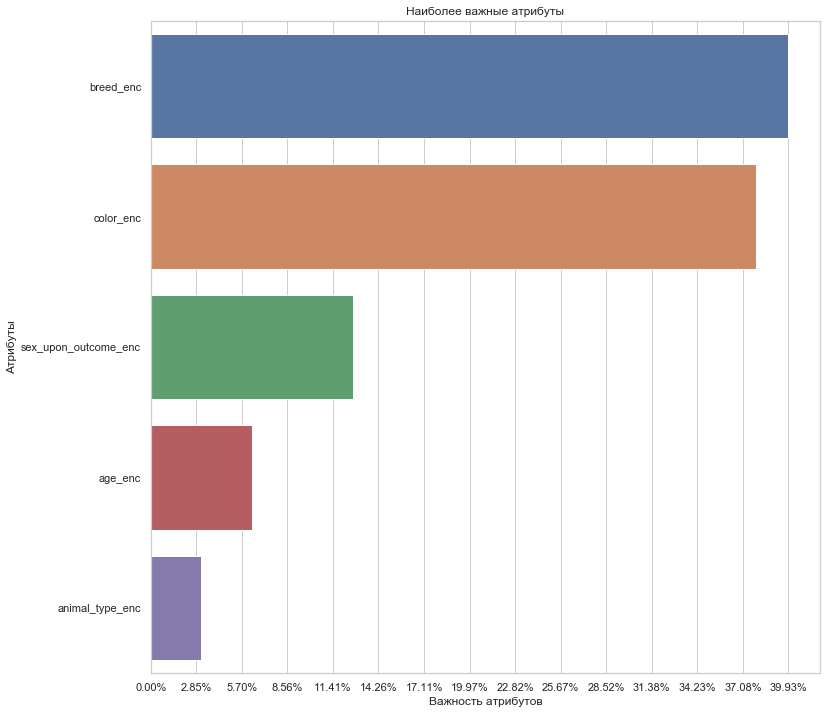

,0
breed_enc,0.399329
color_enc,0.378904
sex_upon_outcome_enc,0.126472
age_enc,0.063601
animal_type_enc,0.031693


In [23]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)